# Twitter Sentiment Classification Predict 

© Explore AI Academy




### Team JM2 Members
- Nokukhanya Magagula
- Ofentse Maleka
- Rethabile Ntshabele
- Palesa Monau
- Modisaotsile Patrick Masilo
- Lethabo Kgathuke

---

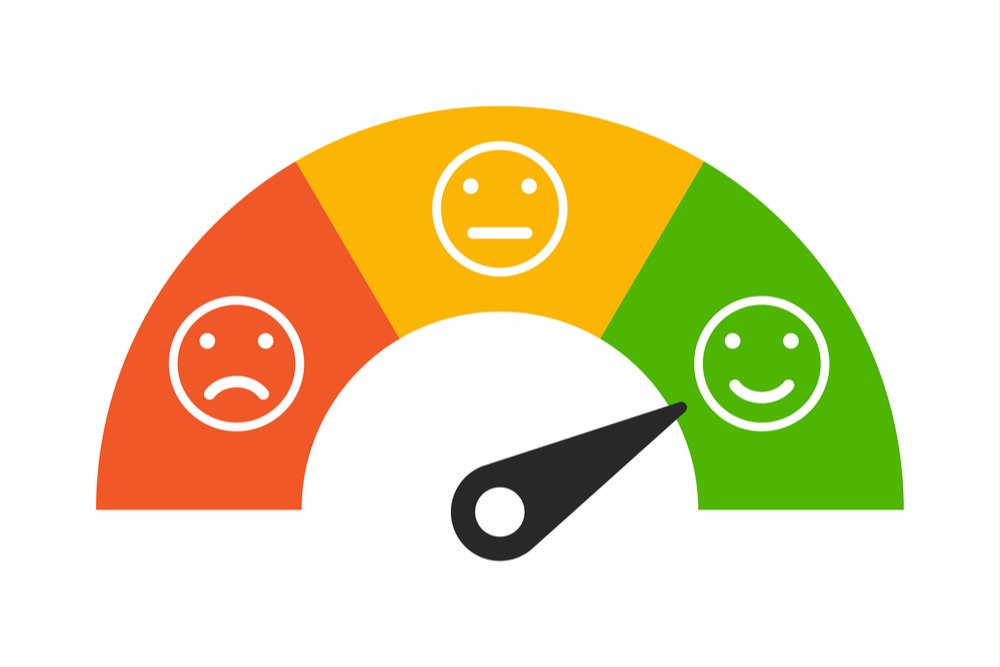

## Introduction

Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material and helping a business to understand the social sentiment of their brand, product or service while monitoring online conversations. Brands can use this data to measure the success of their products in an objective manner.

For this project, climate change is the topic at hand. 

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

What's required for this project is to create a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

This project aims at providing an accurate and robust solution to this task, giving companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.


### Dataset Description

The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43,943 tweets were collected. Each tweet is labelled as one of 4 classes, which are described below.

#### Class Description
- 2  &rarr; **News**: the tweet links to factual news about climate change
- 1  &rarr; **Pro**: the tweet supports the belief of man-made climate change
- 0  &rarr; **Neutral**: the tweet neither supports nor refutes the belief of man-made climate change
- -1 &rarr; **Anti**: the tweet does not believe in man-made climate change

#### Features
- **sentiment** &rarr; which class a tweet belongs in (refer to Class Description above), target variable
- **message** &rarr; Tweet body
- **tweetid** &rarr; Twitter unique id

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

- <a href=#three.1>3.1 Target Variable Analysis</a>

- <a href=#three.2>3.2 Tweets Analysis</a>

<a href=#four>4. Data Preprocessing</a>

- <a href=#four.1>4.1 Text Cleaning</a>

- <a href=#four.2>4.2 Stopwords Removal</a>

- <a href=#four.3>4.3 Text Normalization</a>

- <a href=#four.4>4.4 Clean Data Analysis</a>

<a href=#five>5. Feature Engineering</a>

- <a href=#five.1>5.1 Text Feature Extraction</a>

- <a href=#five.2>5.2 Vectorization</a>

<a href=#six>6. Data Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Model Explanations</a>

<a href=#nine>9. Conclusion</a>

<a href=#ten>10. References</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    


In [69]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="FRnbYP0b4bvjNJuQ2XMV2dhi6",
    project_name="general",
    workspace="classification-2207ftds-team-jm2",
)


COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/classification-2207ftds-team-jm2/general/c1a4baa15beb46f98d06e077149fbef0



In [1]:
# import packages
import pandas as pd
import numpy as np
from os import makedirs
from os import path
import math
from scipy.sparse import csr_matrix
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator

import nltk.downloader
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from pydataset import data
from sklearn.ensemble        import BaggingClassifier, \
         ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.linear_model    import RidgeClassifier
from sklearn.svm             import SVC
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

import pickle
import json

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    

In [2]:
#Loading both the test and the train data

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test_with_no_labels.csv')

In [3]:
#Briefly view the data

df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming an...,625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t....,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is ...",466954


In [4]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make sure that it is not alone in fighting clim...,169760
1,Combine this with the polling of staffers re climate change and womens' rights and you...,35326
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yA...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't ...,476263
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


In the exploratory data analysis, the following questions will be answered to get insights from the dataset:

- What kind of data is this? (number of columns present & datatypes present in the dataset)
- Are there any missing values?
- Are there any duplicated values
- Is there any relationship between different independent variables of the dataset? If yes then how strong is that relationship?

In [5]:
df_train.shape

(15819, 3)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


As one can see, the dataset is quite small, consisting of only 3 columns and 15819 rows. 

In [7]:
#checking for nulls

print('There are ', np.sum(df_train.isnull().any(axis=1)), ' null values in the dataset.')

There are  0  null values in the dataset.


In [8]:
#Checking for any duplicated values

print('There are ', df_train.duplicated().sum(), ' duplicated values in the dataset.')

There are  0  duplicated values in the dataset.


As per our data description above, the column 'sentiment' is the target variable. For better understanding of the target variable, a univariate analysis will be performed below. 

<a id="three.1"></a>
### 3.1 Target Variable Analysis
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


For the target variable analysis, the main focus will be on the distribution. The goal is to find out how the sentiment is distributed in our dataset, e.g., which sentiment has the highest value count, etc. 

Thus the following will be explored:
- summary statistics
- sentiment data sample count
- distribution of sentiment

In [ ]:
#checking unique target values
df_train['sentiment'].unique()

In [ ]:
#Summary statistics

df_train[['sentiment']].describe().T

In [ ]:
# Plotting sentiment data sample count

plt.figure(figsize=(7,5))
df_train['sentiment'].value_counts().plot(kind = 'bar', title='Sentiment Data Sample Count', color='steelblue')
plt.xlabel('Sentiment(Class)')
plt.ylabel("Count of data samples")
plt.show()

In [ ]:
#plotting donut chart to see sentiment distribution

plt.figure(figsize=(10,8))
plt.title('Distribution of sentiment', fontsize=15)
df_train.sentiment.value_counts().plot(kind='pie', labels=['1(Pro)', '2(News)', '0(Neutral)', '-1(Anti)'],
                              wedgeprops=dict(width=.5), autopct='%1.0f%%', startangle= 70, 
                              textprops={'fontsize': 15})

As seen above on the donut chart, majority of the tweets in the dataset indicate users who are believe in man-made climate change while the minority of the tweets are anti man-made climate change. 

For the data preprocessing, two hypotheses can be tested and explored to aid with the data modelling:
- 1. Believers of man-made climate change tweet more about taking actions to fight the phenomenon and so one might find more words relating to positive action to be present in the tweets
- 2. Climate change deniers use the term global warming much often than believers and use aggressive language and words such as "fake", etc. 

<a id="three.2"></a>
### 3.2 Tweets Analysis
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


According to the [Twitter Help Center](https://help.twitter.com/en/using-twitter/retweet-faqs#:~:text=A%20Retweet%20is%20a%20re,re%2Dposting%20someone%20else's%20content): 

"A Retweet is a re-posting of a Tweet. Twitter's Retweet feature helps you and others quickly share that Tweet with all of your followers."

Following the hypotheses stated in the target variable analysis, one can add on the following regarding retweets (RT):
 
- People who are pro the belief of man-made climate change, are more likely to retweet more than others. Their retweets can consist of factual news, web-urls, or even other believers' views. 

To explore that hypothesis, below will be an analysis of the number of retweeted posted per sentiment. 

In [ ]:
# Splitting the dataset according to sentiment

pro = df_train[df_train['sentiment'] == 1]
anti = df_train[df_train['sentiment'] == -1]
neutral = df_train[df_train['sentiment'] == 0]
news = df_train[df_train['sentiment'] == 2]

In [ ]:
# pro rt search 

substring = 'RT'
pro_rt = pro[pro.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
anti_rt = anti[anti.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
neutral_rt = neutral[neutral.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
news_rt = news[news.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]

In [ ]:
#combining the retweet data frames into one subdataframe

RT_data = pd.concat([pro_rt, anti_rt, neutral_rt, news_rt])
RT_data.shape

In [ ]:
words = ' '.join([text for text in RT_data['message']])
wordcloud = WordCloud(width=800,  height=500, random_state = 21, max_font_size=110, background_color = 'white').generate(words)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.title('Most Common Words in Dataset')
plt.show()

As one can see in the image above, "RT" forms part of the most common words in the dataset.

In [ ]:
#Plotting pie chart to see sample count of retweets per sentiment

plt.figure(figsize = (7, 7))
plt.pie(RT_data.sentiment.value_counts().values, labels=['Pro', 'News', 'Neutral', 'Anti'], 
        autopct = '%2.1f%%', textprops={'fontsize': 15})
plt.title('Retweets per Sentiment', fontsize=20)
plt.tight_layout()
plt.show()

This analysis has proven the retweet hypothesis to be true and has shared insight on what steps to consider or what steps to leave out during the data cleaning stage.

<a id="four"></a>
## 4. Data Preprocessing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    

Before commencing with the data preprocessing, a copy of the dataset will be made as a safety precaution.

In [18]:
#Making a copy of both the train and test data

df = df_train.copy()
dft = df_test.copy()

<a id="four.1"></a>
### 4.1 Text Cleaning
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


In context of text analytics, removing noise is a vital part of getting the data into a usable format. For the train dataset, the following will be done:



*   removing '@'-mentions
*   removing the web-urls
*   making everything lower case
*   removing punctuation
*   removing digits and words containing digits
*   removing hashtags, emojis, and unknown characters

Once that is complete, the data will be ready for further analysis and text feature engineering.

#### 4.1.1 Removing '@' mentions

In [19]:
# Removing mentions

def remove_mentions(input_text, pattern):
    '''
    This function serves to remove any mentions denoted by 
    the @ symbol, followed by the twitter handle.
    '''
    r_find = re.findall(pattern, input_text)
    for word in r_find:
        input_text = re.sub(word, '',input_text)
    return input_text

In [ ]:
df['message'] = np.vectorize(remove_mentions)(df['message'],'@[\w]*')
df[['message']].head()

#### 4.1.2 Removing web-urls

In [ ]:
#removing web-urls

pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r''
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [ ]:
#removing remaining https

pattern_url = r'https?:\/\/.*\/\w*'
subs_url = r''
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

#### 4.1.3 Tweet cleaner function

In [ ]:
def tweet_cleaner(tweet):
    
    """
    This function is necessary to remove punctuation, hashtags, 
    numbers and any extra white space from tweets after converting 
    everything to lowercase letters.
    
    """
    # Convert everything to lowercase
    tweet = tweet.lower() 
    
    # Remove punctuation
    tweet = re.sub(r"[,.;':@#?!\&/$]+\ *", ' ', tweet)
    
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)    
    
    # Remove numbers
    tweet = re.sub(r'\d+', '', tweet)  
    
    # Remove whitespace in front of tweet
    tweet = tweet.lstrip(' ')   
    
    # Remove extra whitespace
    tweet = re.sub(r'\s\s+', ' ', tweet)
                          
    
    return tweet


In [ ]:
df['message'] = df['message'].apply(tweet_cleaner)
df.head()

#### 4.1.4 Replacing "rt" with "retweet

In [ ]:
pattern_url = r'rt\s'
subs_url = r'retweet '
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)
df.head()


#### 4.1.5 Removing emojis


In [ ]:
def remove_emojis(string):
    
    """"
    This function serves to remove emojis from the 
    tweets in the data.
    
    """
    
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', string)



In [ ]:
df['message'] = df['message'].apply(remove_emojis)

#### 4.1.6 Removing unknown characters

In [ ]:
#removing the uknown charecters from words

pattern_url = r'[^A-Za-z ]'
subs_url = r''
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

<a id="four.2"></a>
### 4.2 Stopwords Removal
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

Stopwords are the most common words in any natural language. For the purpose of analyzing text data and building NLP models, these stopwords might not add much value to the meaning of the document.

Generally, the most common words used in a text are “the”, “is”, “in”, “for”, “where”, “when”, “to”, “at” etc.

For this classification task, removing stopwords will help so that more focus can be given to those words which define the meaning of the text.

In [ ]:
#Defining the list of stopword wished to be removed. 

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'but', 'by', 'can', 'd', 'did',
             'does', 'doesn', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'shan', "shan't", 'she', "shes", 'should', 'shouldve','so', 'some', 'such',
             't', 'than', 'that', 'thatll', 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'wa', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'with', 'won', 'y', 'you', 'youd','youll', 'youre',
             'you', 've', 'your', 'yours', 'yourself', 'yourselves']

STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])


In [ ]:
df['message'] = df['message'].apply(lambda text: cleaning_stopwords(text))
df[['message']].head()

<a id="four.3"></a>
### 4.3 Text Normalization
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


#### 4.3.1 Tokenisation

Tokenization is a simple process that takes raw data and converts it into a useful data string. Tokenization is used in Natural Language Processing to split paragraphs and sentences into smaller units (i.e, tokens) that can be more easily assigned meaning.


In [31]:
#Creating tokenised column

tokeniser = TreebankWordTokenizer()
df['token'] = df['message'].apply(tokeniser.tokenize)

In [ ]:
df.head()

#### 4.3.2 Lemmatization

Lemmatization is an organized & step-by-step procedure of obtaining the root form of the word. It makes use of vocabulary (dictionary importance of words) and morphological analysis (word structure and grammar relations).

To make the text in the dataset understandable for the machine, lemmatization needs to be performed.

In [ ]:
lemmatizer = WordNetLemmatizer()

def df_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]

In [ ]:
df['lemma'] = df['token'].apply(df_lemma, args=(lemmatizer, ))

In [ ]:
df.tail()

Now that the data has been cleaned, a new column consisting of the lemmmatized words in string datatype will be created and used going forward in this report. 

In [ ]:
df['lemma_str'] = [' '.join(map(str,l)) for l in df['lemma']]
df.head()

<a id="four.4"></a>
### 4.4 Clean Data Analysis
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


Now that the data has been cleaned, one can get a clear idea of common words in the dataset via the WordCloud tool. 

In [ ]:
df_words = pd.Series(df['lemma_str']).str.cat(sep=' ') 

wordcloud = WordCloud(width=1600,height=800,max_font_size=200,max_words=100,
                       collocations = False, background_color = 'white').generate(df_words)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Top 100 Most Common Words', fontsize=70)
plt.tight_layout(pad=0)
plt.show()

From the WordCloud above, it is evident that majority of the tweets:

- are retweets
- consist of action words
- climate change is also referred to as global warming

<a id="five"></a>
## 5. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    


<a id="five.1"></a>
### 5.1 Text Feature Extraction
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


Feature engineering refers to the process the prepared data is tuned to create the features that are expected by the Machine Learning models. 

In this project, for feature engineering, ***n-grams*** will be explored. N-grams are a method to extract combinations of words into features for model buildiing. The n in ngrams specifies the number of tokens to include. For example, a 2-gram returns all the consecutive pairs of words in a sentence.


In [ ]:
def word_grams(words, min_n=1, max_n=4):
    """
    This function inputs a list and output
    a list of n-grams. User can specify number 
    of grams required.
    """
    s = []
    for n in range(min_n, max_n):
        for ngram in ngrams(words, n):
            s.append(' '.join(str(i) for i in ngram))
    return s

In [ ]:
# Adding a bi-gram feature

df['two_gram'] = df['lemma'].apply(lambda x : word_grams(x,2))
df.head()

In [ ]:
# Adding a tri-gram feature
df['three_gram'] = df['lemma'].apply(lambda x : word_grams(x,3))
df.head()

<a id="five.2"></a>
### 5.2 Vectorization
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


In [ ]:
tweet_lemma = df['lemma_str']

In [ ]:
def vectorizeList(lemmatizedList, ngramRangeStart, ngramRangeEnd):
    '''
    Creates a matrix of word vectors.
    :param lemmatizedList: stemmed sentence list
    :return: matrix of word vectors and vocabulary dictionary
    '''
    cv = CountVectorizer(lowercase=True, stop_words='english', max_features=25,analyzer='word', 
                         binary=True, ngram_range=(ngramRangeStart, ngramRangeEnd))
    cv.fit(lemmatizedList)
    X = cv.transform(lemmatizedList)

    return X, cv.vocabulary_

In [ ]:
vectorizedTweets, vectorDictionary = vectorizeList(tweet_lemma, 1, 1)

In [ ]:
vectorizedTweets.shape

<a id="six"></a>
## 6. Data Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    


<a id="seven"></a>
## 7. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    

<a id="eight"></a>
## 8. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    

<a id="nine"></a>
## 9. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    

<a id="ten"></a>
## 10. References
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---